- This code is the process of calculating the vader sentiment score and senticnet score
- This code has to be run on python3

In [1]:
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import re

In [2]:
with open ('sentiment_pattern.csv', 'r') as review:
    df = pd.read_csv(review)
    
col_name = ['index', 'movie', 'review_title', 'rate', 'body', 'helpful', 'pattern_score']
df.columns = col_name

In [4]:
df

,index,movie,review_title,rate,body,helpful,pattern_score
0,0,Code Name: K.O.Z.,"If you want to make propaganda, at least make ...",1,A really horrible film which only aims to incr...,588 out of 842 found this helpful.\n ...,-0.220588
1,1,Code Name: K.O.Z.,This so-called movie is a propaganda !,1,"Shame on the directors, the purpose of this so...",435 out of 673 found this helpful.\n ...,-0.087889
2,2,Code Name: K.O.Z.,Worst propaganda film ever!,1,This is presumably the worst propaganda film e...,391 out of 634 found this helpful.\n ...,-0.006093
3,3,Code Name: K.O.Z.,Terrible movie,1,Really awful. Don't waste your time. if even t...,410 out of 669 found this helpful.\n ...,0.106574
4,4,Code Name: K.O.Z.,awful,1,This was the awful movie I have ever watched i...,337 out of 578 found this helpful.\n ...,-0.017020
5,5,Code Name: K.O.Z.,awful movie. don't waste your time.,1,This shameful movie is about government crimes...,268 out of 498 found this helpful.\n ...,-0.185714
6,6,Code Name: K.O.Z.,An Excellent Turkish Movie .I Respect The Grea...,10,Kod Adı: KOZ gives us the Turkish government's...,178 out of 373 found this helpful.\n ...,0.001833
7,7,Code Name: K.O.Z.,It is a great story!,10,"In my opinion,it is a masterpiece and unforget...",157 out of 328 found this helpful.\n ...,0.350000
8,8,Code Name: K.O.Z.,IMDb please add no star option,1,Dear IMDb! please add a no star option cause i...,144 out of 300 found this helpful.\n ...,0.116919
9,9,Code Name: K.O.Z.,Nearly perfect,9,"I saw the movie, and it was great. Interesting...",104 out of 212 found this helpful.\n ...,0.348529


# using sentiment analysis on the review, and generate a reasonable scale of the rate then comparing the rate of it to give response.

sentiment analysis to give review a identification and then comparing with the rating. If they are match then, we say it is sacarsm.

sentiment analysis and then comparing with the rating. If they don't match, then we say they are sarcasm.

In [4]:
from senticnet.senticnet import SenticNet

In [5]:
sn = SenticNet()

In [6]:
import spacy

nlp = spacy.load('en')

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import stopwords

In [8]:
my_stop_word = stopwords.words('english')

In [107]:
def noun_adj_verb_filter(sentences, stop_words=None):
    """
    Only keep nouns, adjectives, adverb and verbs in the sentence.
    """
    preprocessed_sentences = []
    #keep_types = {'NOUN', 'PROPN', 'ADJ', 'VERB', 'ADV'}
    keep_types = {'ADJ', 'VERB', 'ADV'}
    
    
    for sentence in sentences:
        doc = nlp(sentence)
        keep_tokens_string = ' '.join([t.lemma_ for t in doc if t.pos_ in keep_types and t.lemma_ not in stop_words])
        preprocessed_sentences.append(keep_tokens_string)
        
    return preprocessed_sentences

In [116]:
def decide_sentiment_mean(text):
    '''give sentiment score based on the senticnet package
    and will reture two set of score, one for positive words
    and one for negative words
    return a list [pos_score, neg_score]'''
    positive_sentiment = []
    negative_sentiment = []
    doc = nlp(text)
    for t in doc:
        try:
            polarity = sn.polarity_intense(t.text)
            word_intense = float(polarity)
            if word_intense>=0:
                positive_sentiment.append(str(word_intense))
            else:
                negative_sentiment.append(str(word_intense))
        except:
            next
    
#     pos_score = sum(positive_sentiment)/len(positive_sentiment)
#     neg_score = sum(negative_sentiment)/len(negative_sentiment)
#     if not pos_score:
#         pos_score = 0
#     if not neg_score:
#         neg_score = 0
    score = [positive_sentiment, negative_sentiment]
    return score

In [ ]:
def splitParagraph_to_Sentences(paragraph):
    ''' break a paragraph into sentences
        and return a list '''
    
    #   regular expressions are easiest (and fastest)
    sentenceEnders = re.compile('[.!?]')
    sentenceList = sentenceEnders.split(paragraph)
    for index, line in enumerate(sentenceList):
        if line:
            sentenceList[index] = line.strip()
        else:
            sentenceList.pop(index)
    return sentenceList

In [117]:
%%time
# using the senticnet method to give two score, a positive score count only on postive words
# and a negative score count only on negtive words
for i in range(len(df.body)):
    score_senti = None
    content = df.loc[i, 'body']
    content_list = [content]
    pre_process = noun_adj_verb_filter(content_list, stop_words=my_stop_word)
    score_senti = decide_sentiment_mean(pre_process[0])
    df.loc[i, 'senticnet_pos'] = ';'.join(score_senti[0])
    df.loc[i, 'senticnet_neg'] = ';'.join(score_senti[1])

CPU times: user 17min 56s, sys: 2min 53s, total: 20min 49s
Wall time: 13min 39s


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [105]:
%%time
# give score based on vader, same thing, we give postive score and negative score for the review

for i in range(len(df.body)):
    score_senti = None
    content = df.loc[i, 'body']
    content_list = splitParagraph_to_Sentences(content)
    pos_vader = []
    neg_vader = []
    for sentence in content_list:
        sentiment = analyzer.polarity_scores(sentence)
        positive = str(sentiment['pos'])
        pos_vader.append(positive)
        negative = str(-sentiment['neg'])
        neg_vader.append(negative)
#     try:
#         pos_score = sum(pos_vader.remove(0.0))/len(pos_vader)
#     except:
#         pos_score = sum(pos_vader)/len(pos_vader)

#     try:
#         neg_score = sum(neg_vader.remove(0.0))/len(neg_vader)
#     except:
#         neg_score = sum(neg_vader)/len(neg_vader)
    
    df.loc[i, 'vader_pos'] = ';'.join(pos_vader)
    df.loc[i, 'vader_neg'] = ';'.join(neg_vader)

CPU times: user 1min 6s, sys: 144 ms, total: 1min 6s
Wall time: 1min 6s


In [ ]:
df.to_csv('vader&senticnet.csv', index = 'index')

In [14]:
type(df.senticnet_sentiment[0])
x = df.pattern_score
y = df.senticnet_sentiment

In [15]:
import matplotlib.pyplot as plt

/Users/xusibocn/anaconda/envs/project/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/xusibocn/anaconda/envs/project/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


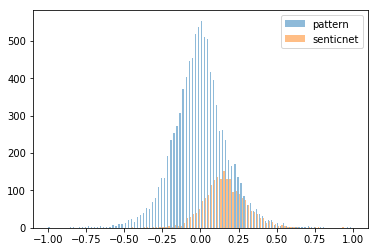

In [16]:
bins = 100
plt.hist([x,y], bins, alpha=0.5, label=['pattern','senticnet'])
plt.legend(loc='upper right')
plt.show()

In [17]:
avg_sentiment = (x+y/2)*10
sentiment_score = round (avg_sentiment, 2)
df.loc[:,'avg'] = avg_sentiment
df.loc[:,'round_avg'] = sentiment_score
df

,index,movie,review_title,rate,body,helpful,pattern_score,senticnet_sentiment,avg,round_avg
0,0,Code Name: K.O.Z.,"If you want to make propaganda, at least make ...",1,A really horrible film which only aims to incr...,588 out of 842 found this helpful.\n ...,-0.220588,0.100594,-1.702914,-1.70
1,1,Code Name: K.O.Z.,This so-called movie is a propaganda !,1,"Shame on the directors, the purpose of this so...",435 out of 673 found this helpful.\n ...,-0.087889,0.341720,0.829711,0.83
2,2,Code Name: K.O.Z.,Worst propaganda film ever!,1,This is presumably the worst propaganda film e...,391 out of 634 found this helpful.\n ...,-0.006093,0.181583,0.846986,0.85
3,3,Code Name: K.O.Z.,Terrible movie,1,Really awful. Don't waste your time. if even t...,410 out of 669 found this helpful.\n ...,0.106574,0.382769,2.979587,2.98
4,4,Code Name: K.O.Z.,awful,1,This was the awful movie I have ever watched i...,337 out of 578 found this helpful.\n ...,-0.017020,0.334707,1.503333,1.50
5,5,Code Name: K.O.Z.,awful movie. don't waste your time.,1,This shameful movie is about government crimes...,268 out of 498 found this helpful.\n ...,-0.185714,0.186652,-0.923882,-0.92
6,6,Code Name: K.O.Z.,An Excellent Turkish Movie .I Respect The Grea...,10,Kod Adı: KOZ gives us the Turkish government's...,178 out of 373 found this helpful.\n ...,0.001833,0.141489,0.725778,0.73
7,7,Code Name: K.O.Z.,It is a great story!,10,"In my opinion,it is a masterpiece and unforget...",157 out of 328 found this helpful.\n ...,0.350000,0.095125,3.975625,3.98
8,8,Code Name: K.O.Z.,IMDb please add no star option,1,Dear IMDb! please add a no star option cause i...,144 out of 300 found this helpful.\n ...,0.116919,0.390219,3.120286,3.12
9,9,Code Name: K.O.Z.,Nearly perfect,9,"I saw the movie, and it was great. Interesting...",104 out of 212 found this helpful.\n ...,0.348529,0.324742,5.109004,5.11


In [120]:
# decision rules, first version still
for i in range(len(df.round_avg)-1):
    round_average = df.loc[i, 'round_avg']
    rate = df.loc[i, 'rate']
    if round_average< 0 and rate <=3:
        df.loc[i, 'sarcasm'] = False
    elif round_average >=0 and rate <=3 and abs(rate-round_average)>=3:
        df.loc[i, 'sarcasm'] = True
    elif round_average <0 and rate >3:
        df.loc[i, 'sarcasm'] = True
    elif round_average >=0 and rate >=3 and abs(rate-round_average)<=3:
        df.loc[i, 'sarcasm'] = False
    else:
        df.loc[i, 'sarcasm'] = False

In [25]:
def splitParagraph_to_Sentences(paragraph):
    ''' break a paragraph into sentences
        and return a list '''
    
    #   regular expressions are easiest (and fastest)
    sentenceEnders = re.compile('[.!?]')
    sentenceList = sentenceEnders.split(paragraph)
    for index, line in enumerate(sentenceList):
        if line:
            sentenceList[index] = line.strip()
        else:
            sentenceList.pop(index)
    return sentenceList

In [141]:
content = df.loc[0, 'body']
new = splitParagraph_to_Sentences(content)

In [130]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("I love this library", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7996209910191279, p_neg=0.2003790089808724)

In [131]:
blob = TextBlob("I love this library", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.7996209910191279, p_neg=0.2003790089808724)

In [135]:
# another way to decide sentiment of the sentence.
# resource: https://github.com/fnielsen/afinn
from afinn import Afinn
afinn = Afinn()
afinn.score('This is very bad!')

-3.0

In [147]:
afinn.score(new[2])

-4.0

In [149]:
content_list = [content]
pre_process = noun_adj_verb_filter(content_list, stop_words=my_stop_word)

In [150]:
afinn.score(content_list[0])

-12.0

In [5]:
# pattern need to be run under python 2.5+
# resource: https://www.clips.uantwerpen.be/pages/pattern-en#sentiment
from pattern.en import sentiment

In [ ]:
# using the average of scores from two sentiment analysis methods, and assign emotion level to the review
# comparing with the rate, if they are not match, label as sarcasm


In [ ]:
# i will try three method together and then compare them

In [165]:
def remove_zero(a_string):
    a_list = a_string.split(';')
    ref = []
    for i in a_list:
        if not i == '':
            if i == '0.0':
                a_list.remove('0.0')
            elif i == '-0.0':
                a_list.remove('-0.0')
            output = a_list
        else:
            output = ['0']
    if output == ref:
        output = ['0']
    return output

In [166]:
def listmean (input_list):
    for i, v in enumerate(input_list):
        if v:
            input_list[i] = float(v)
        else:
            input_list[i] = 0
    new_list = input_list
    listmean = sum(new_list)/len(new_list)
    
    return listmean

In [169]:
review_sentiment = []
for i in range(len(df.index)):
    index = df.loc[i, 'index']
    movie = df.loc[i, 'movie']
    review = df.loc[i, 'body']
    rate = df.loc[i, 'rate']
    vader_pos = df.loc[i,'vader_pos']
    vader_neg = df.loc[i,'vader_neg']
    senticnet_pos = df.loc[i,'senticnet_pos']
    senticnet_neg = df.loc[i,'senticnet_neg']
    vader_pos_mean = listmean(remove_zero(vader_pos))
    vader_neg_mean = listmean(remove_zero(vader_neg))
    senticnet_pos_mean = listmean(remove_zero(senticnet_pos))
    senticnet_neg_mean = listmean(remove_zero(senticnet_neg))
    review_info = [index, movie, review, rate, vader_pos_mean, vader_neg_mean, senticnet_pos_mean, senticnet_neg_mean]
    review_sentiment.append(review_info)

In [176]:
df_vands = pd.DataFrame(review_sentiment, columns=['index', 'movie', 'body','rate', 
                                         'vader_pos', 'vader_neg', 'senticnet_pos',
                                        'senticnet_neg'])

In [177]:
df_vands.to_csv('sentiment_vader_senticnet.csv', index='index')

In [179]:
df_vands

,index,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg
0,0,Code Name: K.O.Z.,A really horrible film which only aims to incr...,1,0.145500,-0.225000,0.575450,-0.690833
1,1,Code Name: K.O.Z.,"Shame on the directors, the purpose of this so...",1,0.132833,-0.239333,0.623316,-0.550000
2,2,Code Name: K.O.Z.,This is presumably the worst propaganda film e...,1,0.218714,-0.196667,0.481886,-0.626923
3,3,Code Name: K.O.Z.,Really awful. Don't waste your time. if even t...,1,0.237364,-0.166182,0.645097,-0.633750
4,4,Code Name: K.O.Z.,This was the awful movie I have ever watched i...,1,0.149600,-0.155273,0.547281,-0.421111
5,5,Code Name: K.O.Z.,This shameful movie is about government crimes...,1,0.163571,-0.212222,0.498937,-0.527143
6,6,Code Name: K.O.Z.,Kod Adı: KOZ gives us the Turkish government's...,10,0.156583,-0.135200,0.470381,-0.625926
7,7,Code Name: K.O.Z.,"In my opinion,it is a masterpiece and unforget...",10,0.245667,-0.090000,0.396833,-0.810000
8,8,Code Name: K.O.Z.,Dear IMDb! please add a no star option cause i...,1,0.239500,-0.137000,0.487828,-0.553333
9,9,Code Name: K.O.Z.,"I saw the movie, and it was great. Interesting...",9,0.326556,-0.148571,0.590708,-0.587143
